In [17]:
# 기본 라이브러리 로딩
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 테마 설정
sns.set_theme(style="whitegrid")

# 데이터 폴더 경로 설정
base_path = r"C:\Users\원정현\Desktop\동국대학교\데이터 공모전\Kaggle 시험 점수 예측\playground-series-s6e1"

# 파일 경로 결합 설정
train_path = os.path.join(base_path, "train.csv")
test_path = os.path.join(base_path, "test.csv")
submission_path = os.path.join(base_path, "sample_submission.csv")

# 데이터 로딩
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
submission = pd.read_csv(submission_path)

# 데이터 크기 확인
print("\n[Data Shape]")
print(f"Train set: {train.shape}")
print(f"Test set: {test.shape}")
print(f"Submission: {submission.shape}")

# 학습 데이터 상위 샘플 확인
print("\n[Train Data Head]")
display(train.head())

# 학습 데이터 결측값 계산
print("\n[Missing Values in Train]")
train_null_counts = train.isnull().sum()

# 결측값 존재 여부 확인
if train_null_counts.sum() == 0:
    print("No missing values found.")
else:
    # 결측값이 존재하는 컬럼만 출력
    print(train_null_counts[train_null_counts > 0])

# 테스트 데이터 결측값 계산
print("\n[Missing Values in Test]")
test_null_counts = test.isnull().sum()

# 결측값 존재 여부 확인
if test_null_counts.sum() == 0:
    print("No missing values found.")
else:
    # 결측값이 존재하는 컬럼만 출력
    print(test_null_counts[test_null_counts > 0])


[Data Shape]
Train set: (630000, 13)
Test set: (270000, 12)
Submission: (270000, 2)

[Train Data Head]


,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0



[Missing Values in Train]
No missing values found.

[Missing Values in Test]
No missing values found.


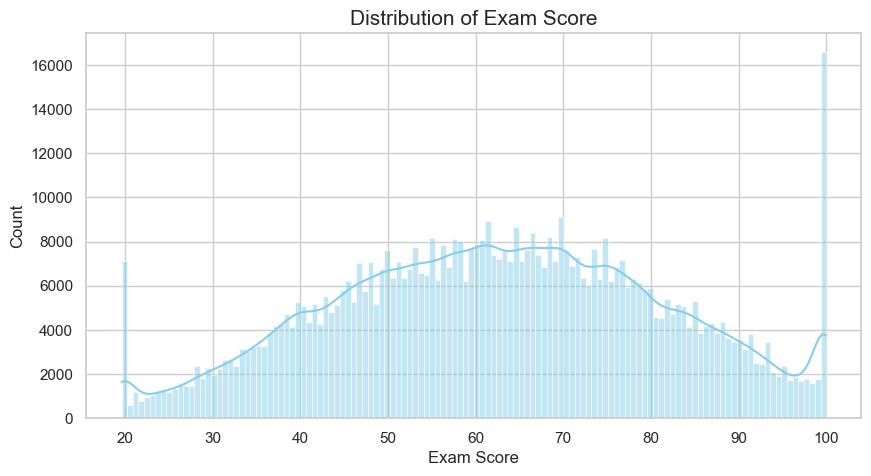

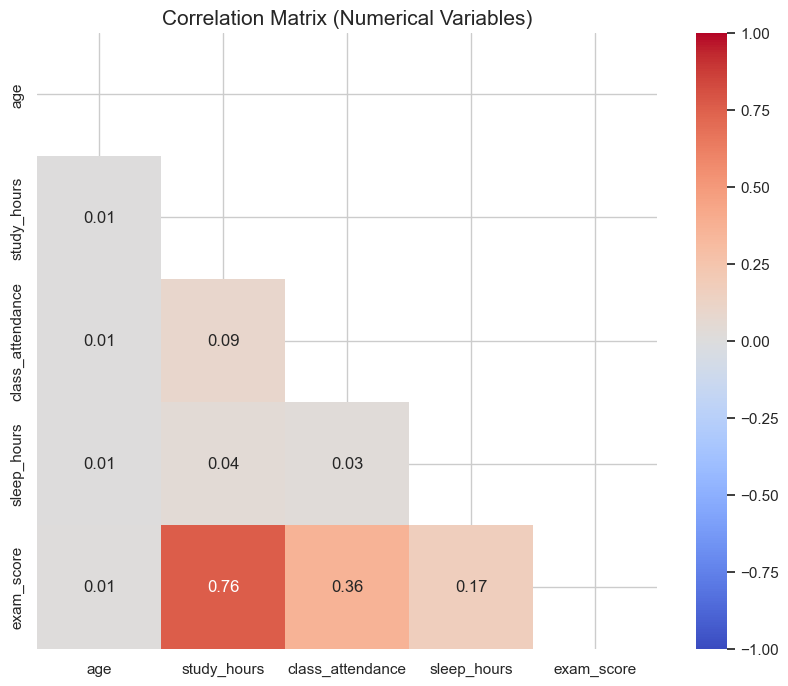

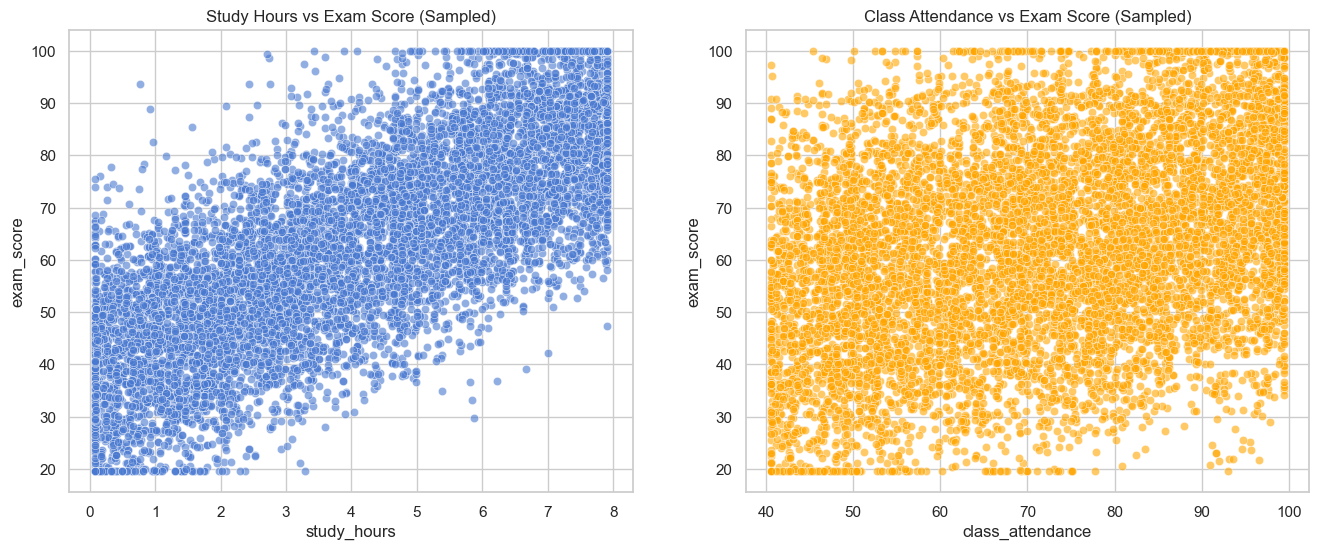

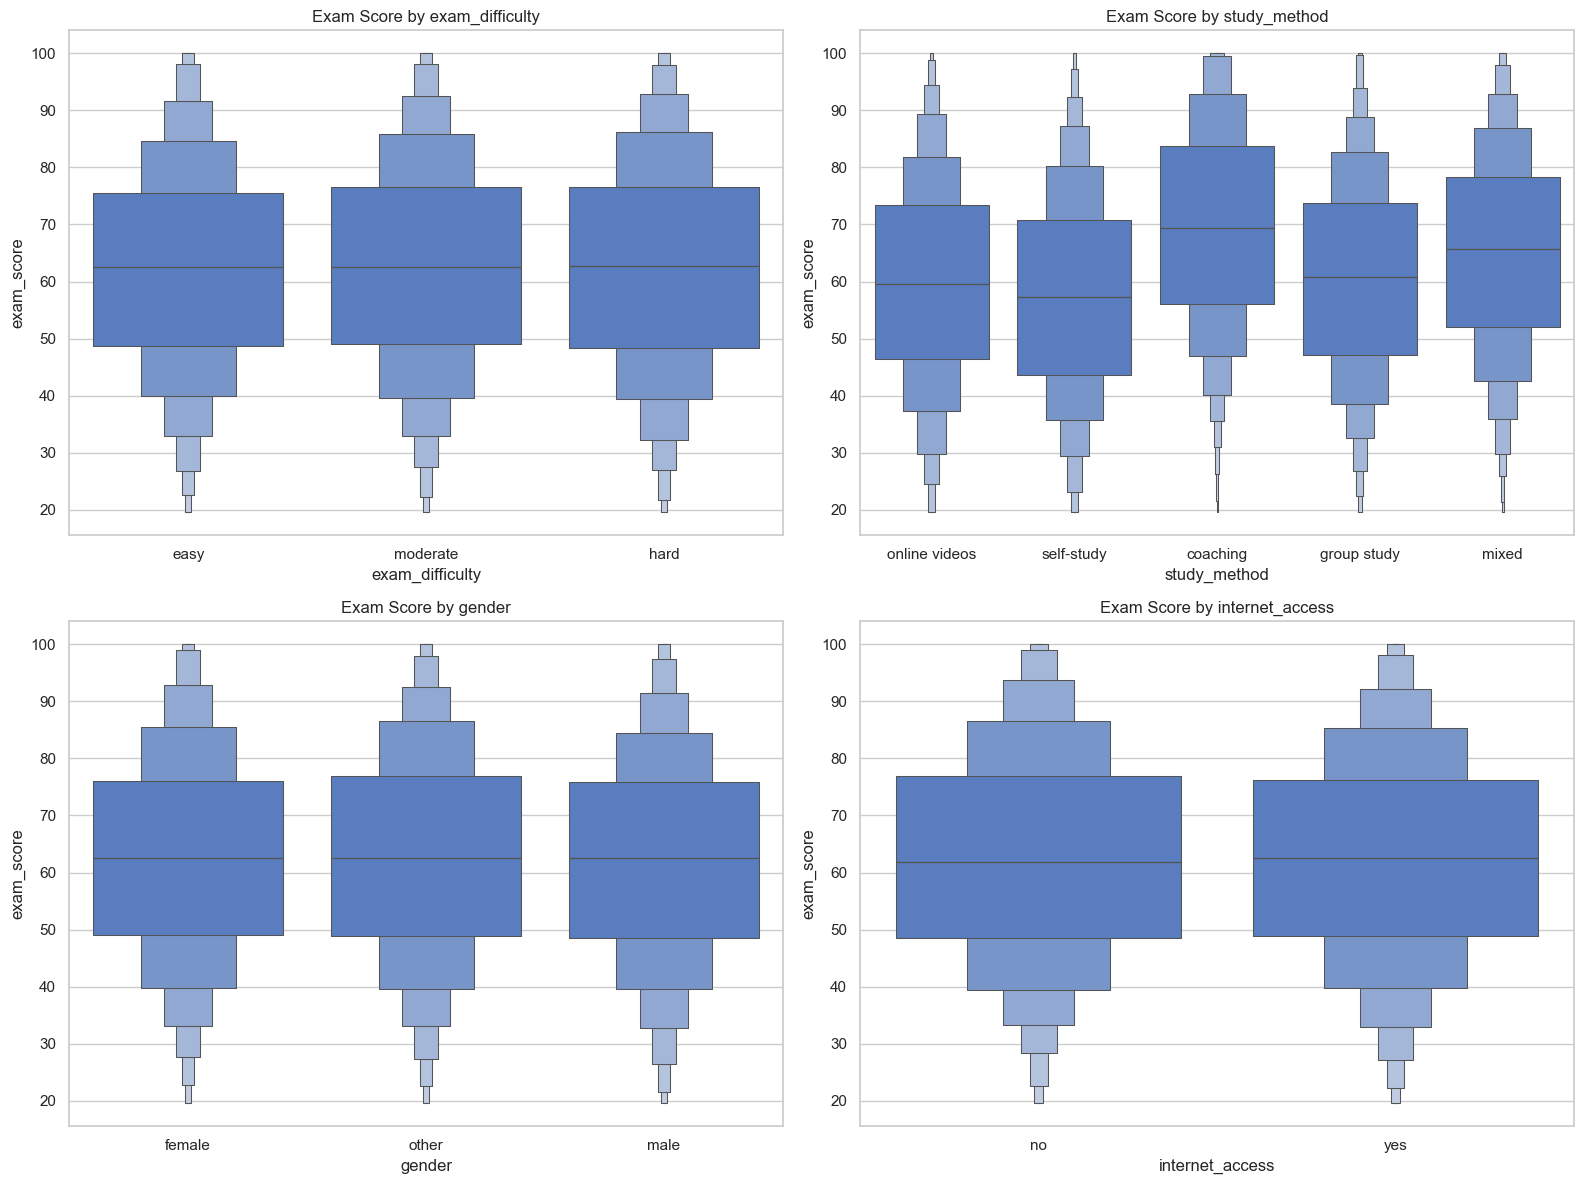

In [18]:
# 기본 EDA 설정

# 시각화 스타일 설정
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (12, 6)

# 타겟 변수 분포 시각화
plt.figure(figsize=(10, 5))
sns.histplot(train["exam_score"], kde=True, color="skyblue")
plt.title("Distribution of Exam Score", fontsize=15)
plt.xlabel("Exam Score")
plt.ylabel("Count")
plt.show()

# 수치형 컬럼 추출 및 상관계수 계산
numeric_cols = train.select_dtypes(include=[np.number]).drop(columns=["id"], errors="ignore")
corr_matrix = numeric_cols.corr()

# 상관관계 히트맵 마스킹 생성
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
)
plt.title("Correlation Matrix (Numerical Variables)", fontsize=15)
plt.show()

# 시각화용 샘플 데이터 추출
sample_df = train.sample(10000, random_state=42)

# 수치형 변수와 타겟 관계 시각화 축 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 공부 시간과 시험 점수 관계 시각화
sns.scatterplot(
    data=sample_df,
    x="study_hours",
    y="exam_score",
    ax=axes[0],
    alpha=0.6,
)
axes[0].set_title("Study Hours vs Exam Score (Sampled)")

# 출석률과 시험 점수 관계 시각화
sns.scatterplot(
    data=sample_df,
    x="class_attendance",
    y="exam_score",
    ax=axes[1],
    color="orange",
    alpha=0.6,
)
axes[1].set_title("Class Attendance vs Exam Score (Sampled)")

plt.show()

# 범주형 변수 목록 설정
categorical_features = ["exam_difficulty", "study_method", "gender", "internet_access"]

# 범주형 변수별 점수 분포 시각화 축 생성
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 범주형 변수별 점수 분포 시각화 반복
for idx, feature in enumerate(categorical_features):
    row_idx, col_idx = divmod(idx, 2)
    sns.boxenplot(
        data=train,
        x=feature,
        y="exam_score",
        ax=axes[row_idx, col_idx],
    )
    axes[row_idx, col_idx].set_title(f"Exam Score by {feature}")

# 레이아웃 정리
plt.tight_layout()
plt.show()

In [ ]:
# 1. 수치형 변수는 공부 시간을 제외하면 상관관계가 그리 높게 나온 변수는 없었음
# 2. 범주형 변수 중 시험 점수에 유의미한 영향을 주는 변수는 그리 많지 않아보임
# 3. 시험 점수의 분포는 전체적으로 완만한 곡선, 다만 100점과 0점의 비율이 생각보다 높았음


[Perfect Scorer vs Others : 수치형 변수 평균 비교]


,study_hours,class_attendance,sleep_hours
is_perfect,,,
False,3.923373,71.640000,7.052765
True,7.141599,85.792852,7.867609


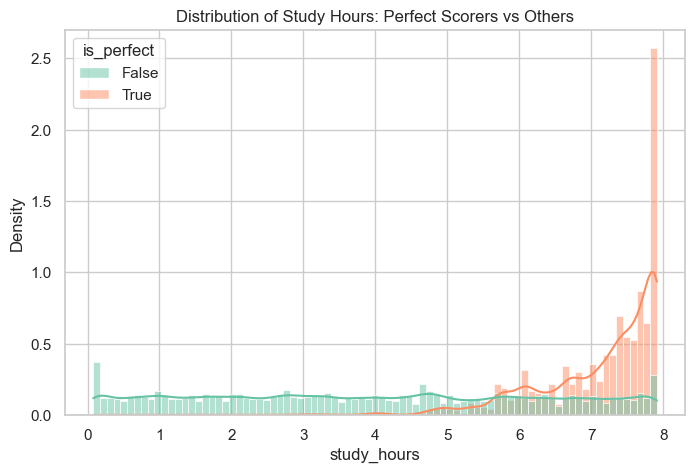

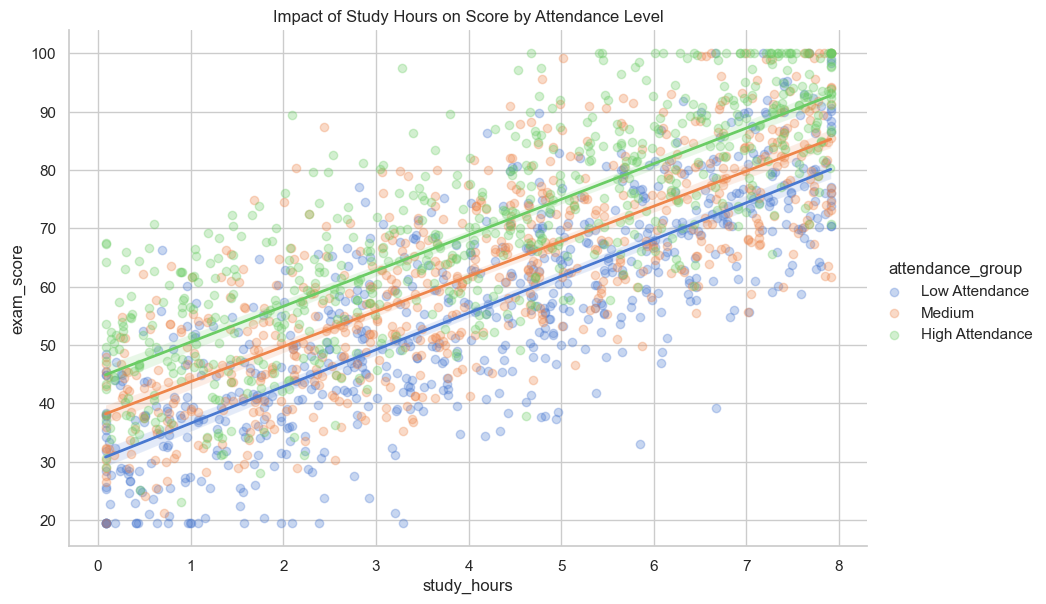

C:\Users\원정현\AppData\Local\Temp\ipykernel_4700\1330109280.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\원정현\AppData\Local\Temp\ipykernel_4700\1330109280.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


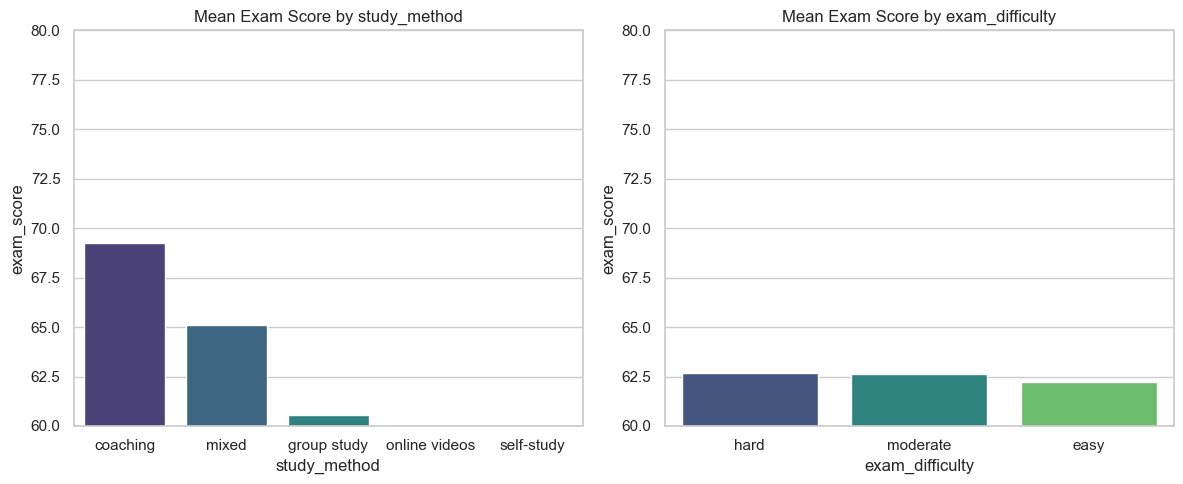

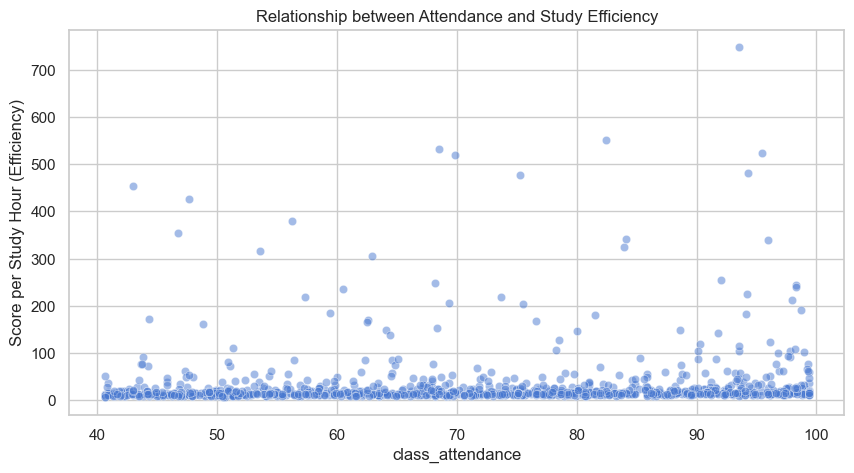

In [19]:
# 만점 집단 비교 및 상호작용 탐색 설정

# 만점 여부 컬럼 생성
train["is_perfect"] = train["exam_score"] == 100

# 만점 집단과 일반 집단 수치형 변수 평균 비교 출력
print("\n[Perfect Scorer vs Others : 수치형 변수 평균 비교]")
comparison = (
    train.groupby("is_perfect")[["study_hours", "class_attendance", "sleep_hours"]]
    .mean()
)
display(comparison)

# 만점 여부에 따른 공부 시간 분포 시각화
plt.figure(figsize=(8, 5))
sns.histplot(
    data=train,
    x="study_hours",
    hue="is_perfect",
    stat="density",
    common_norm=False,
    kde=True,
    palette="Set2",
)
plt.title("Distribution of Study Hours: Perfect Scorers vs Others")
plt.show()

# 출석률 구간화 컬럼 생성
train["attendance_group"] = pd.qcut(
    train["class_attendance"],
    q=3,
    labels=["Low Attendance", "Medium", "High Attendance"],
)

# 출석률 그룹별 공부 시간과 점수 관계 시각화용 샘플 생성
interaction_sample = train.sample(2000, random_state=42)

# 출석률 그룹별 선형 관계 시각화
sns.lmplot(
    data=interaction_sample,
    x="study_hours",
    y="exam_score",
    hue="attendance_group",
    scatter_kws={"alpha": 0.3},
    line_kws={"linewidth": 2},
    height=6,
    aspect=1.5,
)
plt.title("Impact of Study Hours on Score by Attendance Level")
plt.show()

# 평균 점수 기준 범주형 변수 비교 대상 설정
categorical_cols = ["study_method", "exam_difficulty", "parental_education"]

# 데이터셋에 존재하는 범주형 변수만 필터링
cols_to_plot = [col_name for col_name in categorical_cols if col_name in train.columns]

# 선택한 범주형 변수가 존재하는 경우 시각화 구성
if cols_to_plot:
    fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(6 * len(cols_to_plot), 5))

    # 단일 축인 경우 축 리스트 형태로 보정
    if len(cols_to_plot) == 1:
        axes = [axes]

    # 범주형 변수별 평균 점수 막대그래프 시각화 반복
    for ax_idx, feature in enumerate(cols_to_plot):
        order = (
            train.groupby(feature)["exam_score"]
            .mean()
            .sort_values(ascending=False)
            .index
        )

        sns.barplot(
            data=train,
            x=feature,
            y="exam_score",
            order=order,
            ax=axes[ax_idx],
            palette="viridis",
            errorbar=None,
        )
        axes[ax_idx].set_title(f"Mean Exam Score by {feature}")
        axes[ax_idx].set_ylim(60, 80)

    plt.tight_layout()
    plt.show()

# 선택한 범주형 변수가 존재하지 않는 경우 안내 출력
else:
    print("선택한 범주형 변수가 데이터에 없습니다.")

# 공부 효율성 파생 변수 생성
train["efficiency"] = train["exam_score"] / (train["study_hours"] + 0.01)

# 출석률과 공부 효율성 관계 시각화용 샘플 생성
efficiency_sample = train.sample(1000, random_state=42)

# 출석률과 공부 효율성 관계 시각화
plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=efficiency_sample,
    x="class_attendance",
    y="efficiency",
    alpha=0.5,
)
plt.title("Relationship between Attendance and Study Efficiency")
plt.ylabel("Score per Study Hour (Efficiency)")
plt.show()


In [ ]:
# 이번에는 그룹을 두 그룹으로 분할: 100점을 맞은 그룹(Perfect Score True)과 그렇지 않은 그룹(Perfect Score False)
# 1. 100점이 아닌 그룹보다는 100점을 맞은 그룹의 특징을 파악할 수 있었음(100점을 맞은 그룹은 역시나 공부 시간이 대체적으로 많은 편 -> 당연한 이야기일지도;;)
# 2. 전체적으로 출석이 높을 수록 성적이 오르는 경향은 존재했음. 다만 같은 그룹 내에서도 공부 시간이 많을 수록 성적이 오르는 상관 관계를 어느 정도 볼 수 있었음
# 3. exam_difficulty에 따른 성적 차이는 크게 없었다 -> 이 컬럼을 어떻게 활용할 수 있을까?
# 4. 코칭 방법에 따라서는 어느 성적 차이가 난 것 같음
# 5. 출석률과 공부 시간? -> 큰 상관이 없다

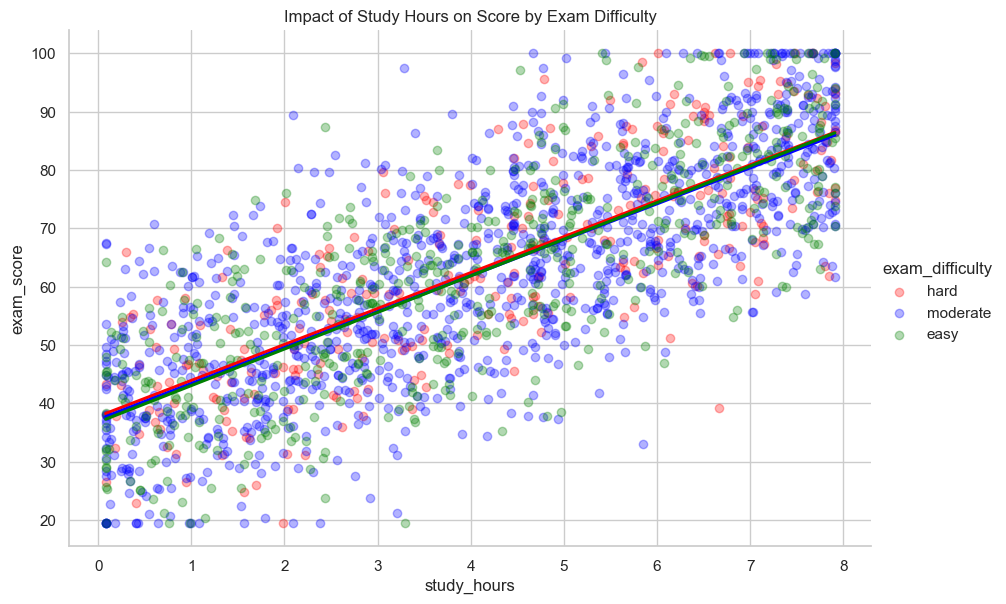

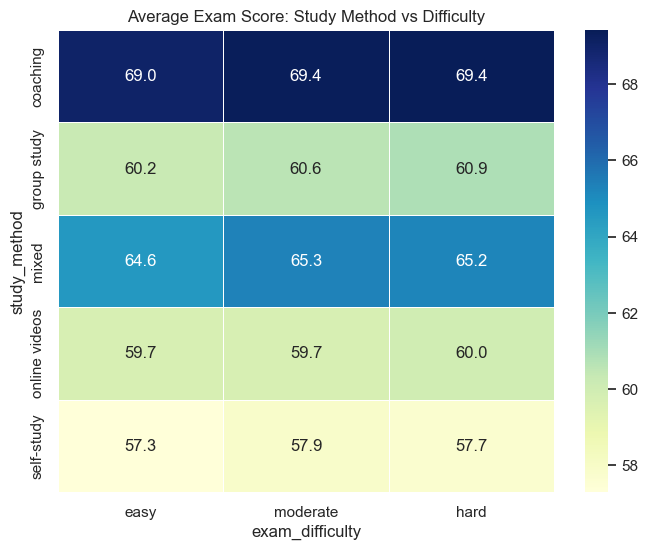

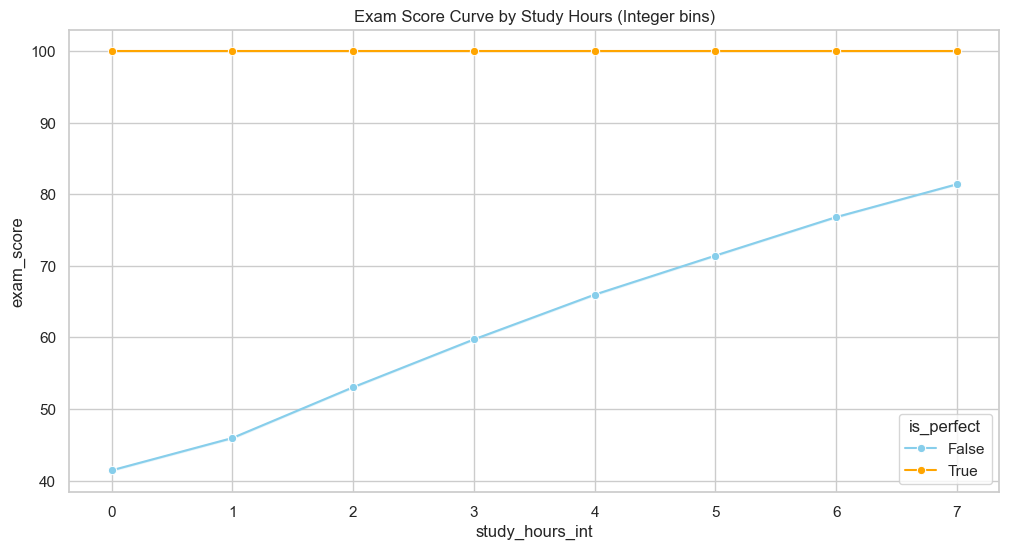

In [20]:
# 난이도 상호작용 및 비선형성 탐색 설정

# 난이도별 공부 시간과 점수 관계 시각화용 샘플 생성
difficulty_sample = train.sample(2000, random_state=42)

# 난이도별 공부 시간과 점수 관계 시각화
sns.lmplot(
    data=difficulty_sample,
    x="study_hours",
    y="exam_score",
    hue="exam_difficulty",
    ci=None,
    height=6,
    aspect=1.5,
    palette={"easy": "green", "moderate": "blue", "hard": "red"},
    scatter_kws={"alpha": 0.3},
)
plt.title("Impact of Study Hours on Score by Exam Difficulty")
plt.show()

# 공부 방법과 난이도 조합별 평균 점수 피벗 테이블 생성
pivot_table = train.pivot_table(
    index="study_method",
    columns="exam_difficulty",
    values="exam_score",
    aggfunc="mean",
)

# 난이도 컬럼 순서 정렬
pivot_table = pivot_table[["easy", "moderate", "hard"]]

# 공부 방법과 난이도 조합별 평균 점수 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    linewidths=0.5,
)
plt.title("Average Exam Score: Study Method vs Difficulty")
plt.show()

# 공부 시간을 정수 단위 구간으로 변환
train["study_hours_int"] = train["study_hours"].astype(int)

# 공부 시간 구간별 점수 추세 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=train,
    x="study_hours_int",
    y="exam_score",
    hue="is_perfect",
    marker="o",
    palette={True: "orange", False: "skyblue"},
)
plt.title("Exam Score Curve by Study Hours (Integer bins)")
plt.grid(True)
plt.show()

In [ ]:
# 1. Exam Difficulty는 정말 아무런 영향도 줄 수 없는 컬럼인가?
# -> Exam Difficulty와 다른 변수들을 모두 한 번씩 조합해보고(변수 간 관계 탐구) 시험점수가 어떻게 달라지는지도 확인해봐야 할 것 같음
# 2. False인 그룹도 공부를 열심히 할 수록 시험점수가 오르는 경향이 존재 -> 결국 Key가 될 변수는 study_hours로 보임

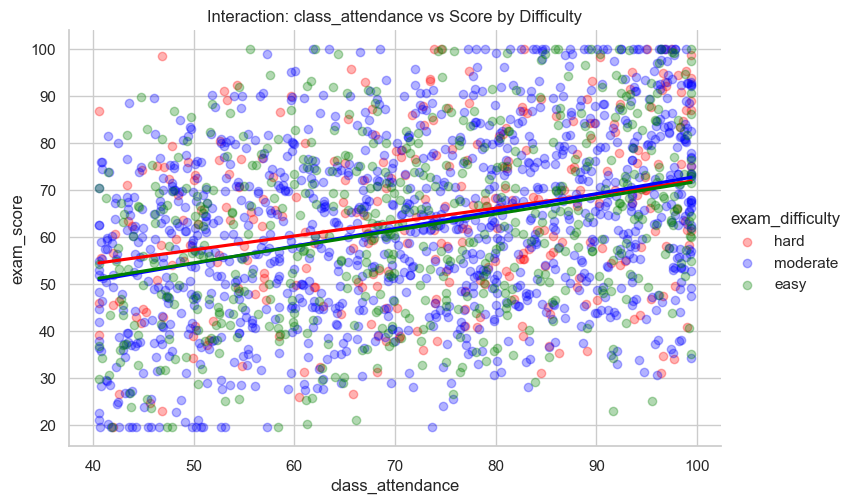

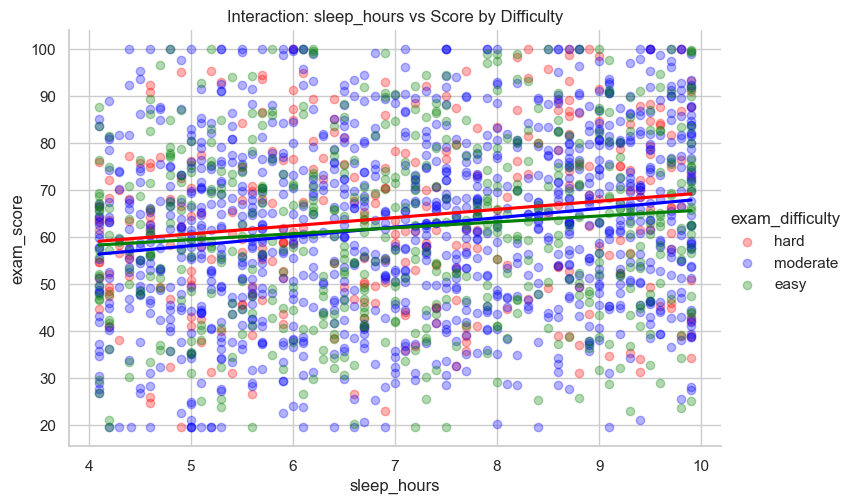

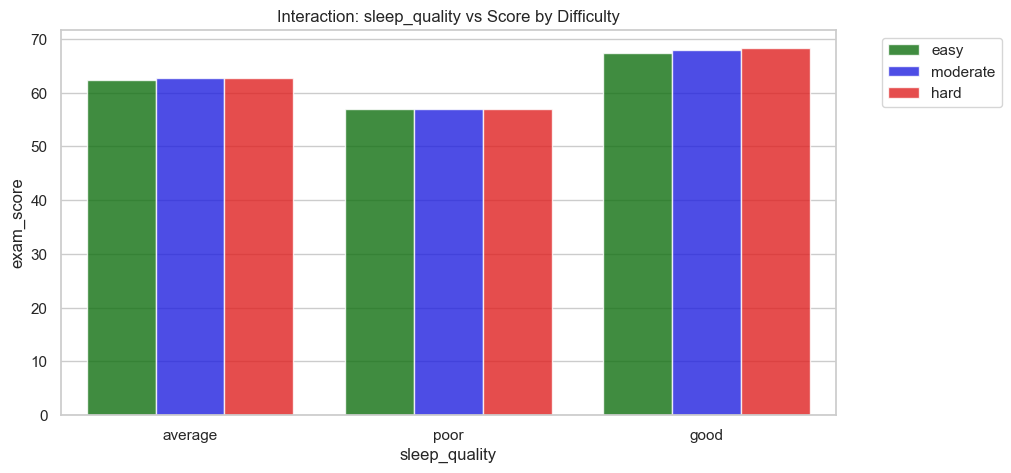

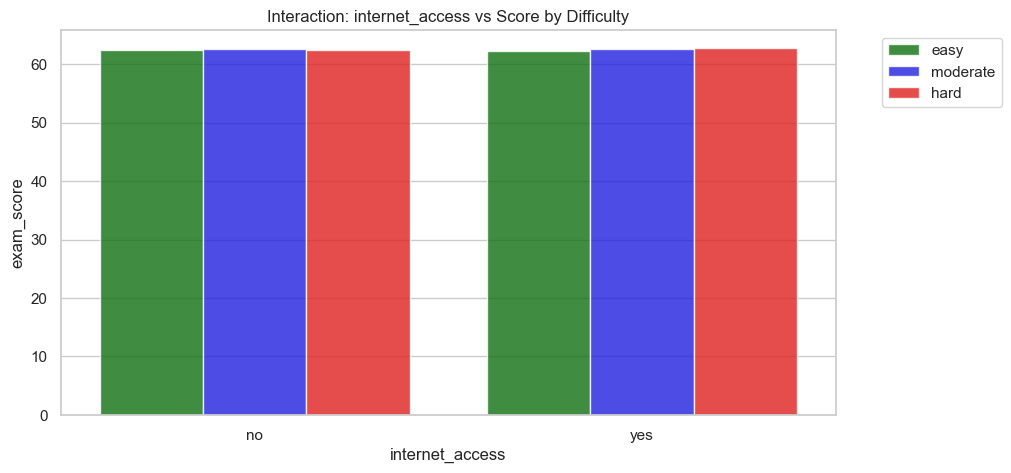

In [22]:
# 난이도와 주요 변수 상호작용 시각화 설정

# 상호작용 확인 대상 컬럼 목록 설정
interaction_targets = [
    "class_attendance",
    "sleep_hours",
    "sleep_quality",
    "internet_access",
    "parental_education",
]

# 데이터셋에 존재하는 컬럼만 필터링
valid_targets = [feature for feature in interaction_targets if feature in train.columns]

# 난이도별 색상 매핑 설정
difficulty_palette = {"easy": "green", "moderate": "blue", "hard": "red"}

# 시각화용 샘플 데이터 생성
interaction_sample = train.sample(2000, random_state=42)

# 컬럼별 상호작용 시각화 반복
for feature in valid_targets:
    # 수치형 변수 여부 판단
    is_numeric_feature = pd.api.types.is_numeric_dtype(train[feature])

    # 수치형 변수 상호작용 시각화
    if is_numeric_feature:
        sns.lmplot(
            data=interaction_sample,
            x=feature,
            y="exam_score",
            hue="exam_difficulty",
            palette=difficulty_palette,
            scatter_kws={"alpha": 0.3},
            height=5,
            aspect=1.5,
            ci=None,
        )
        plt.title(f"Interaction: {feature} vs Score by Difficulty")
        plt.show()

    # 범주형 변수 상호작용 시각화
    else:
        plt.figure(figsize=(10, 5))

        sns.barplot(
            data=train,
            x=feature,
            y="exam_score",
            hue="exam_difficulty",
            palette=difficulty_palette,
            errorbar=None,
            alpha=0.8,
        )
        plt.title(f"Interaction: {feature} vs Score by Difficulty")
        plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
        plt.show()

In [ ]:
# Exam Difficulty와 다른 변수를 같이 봐도 크게 유의미한 경향은 보이지 않음

C:\Users\원정현\AppData\Local\Temp\ipykernel_4700\2006536155.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


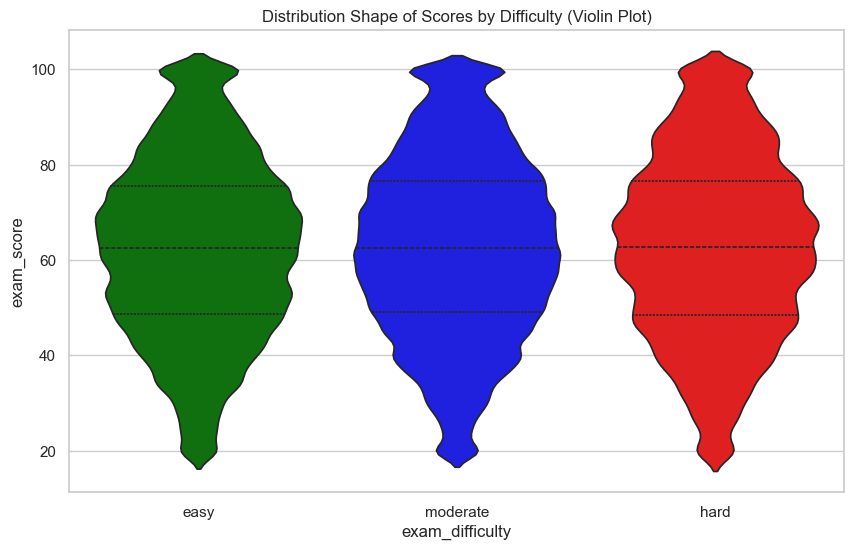


[난이도별 점수 통계량 상세 비교]


,mean,std,min,max,25%,75%
exam_difficulty,,,,,,
easy,62.214401,18.708772,19.599,100.0,48.7,75.5
moderate,62.606060,18.956526,19.599,100.0,49.0,76.5
hard,62.671693,19.136236,19.599,100.0,48.4,76.6


C:\Users\원정현\AppData\Local\Temp\ipykernel_4700\2006536155.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


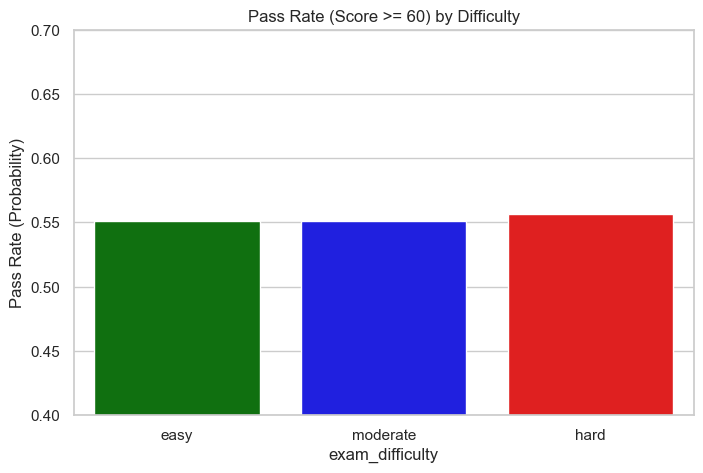

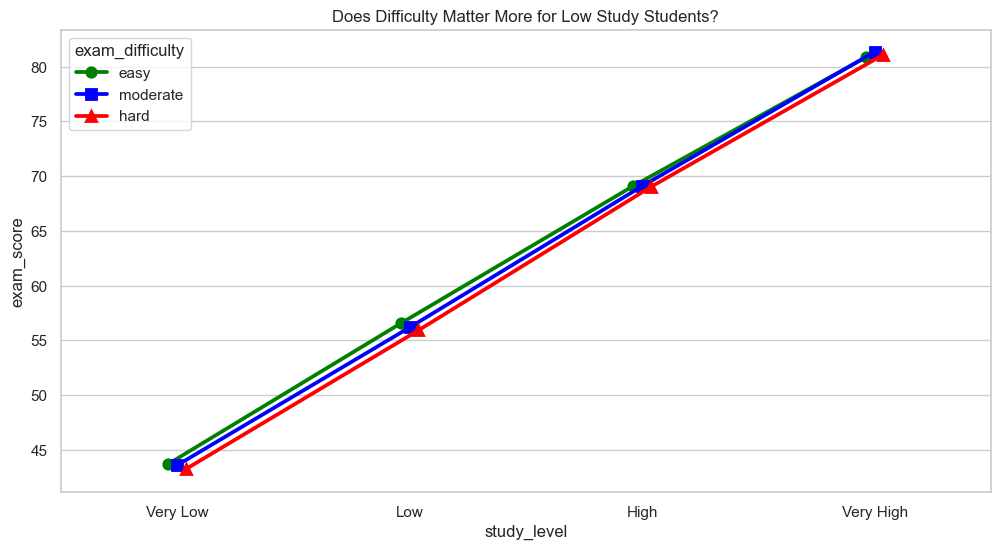

In [23]:
# Exam Difficulty 분포와 위험 구간 탐색 설정

# 난이도별 점수 분포 형태 시각화
plt.figure(figsize=(10, 6))
difficulty_order = ["easy", "moderate", "hard"]
difficulty_palette = {"easy": "green", "moderate": "blue", "hard": "red"}

sns.violinplot(
    data=train,
    x="exam_difficulty",
    y="exam_score",
    order=difficulty_order,
    palette=difficulty_palette,
    inner="quartile",
)
plt.title("Distribution Shape of Scores by Difficulty (Violin Plot)")
plt.show()

# 난이도별 점수 통계량 계산
print("\n[난이도별 점수 통계량 상세 비교]")
desc_stat = (
    train.groupby("exam_difficulty")["exam_score"]
    .describe()[["mean", "std", "min", "max", "25%", "75%"]]
)

# 난이도 순서 정렬 출력
display(desc_stat.loc[difficulty_order])

# 합격 여부 컬럼 생성
train["is_pass"] = train["exam_score"] >= 60

# 난이도별 합격률 시각화
plt.figure(figsize=(8, 5))
sns.barplot(
    data=train,
    x="exam_difficulty",
    y="is_pass",
    order=difficulty_order,
    palette=difficulty_palette,
    errorbar=None,
)
plt.title("Pass Rate (Score >= 60) by Difficulty")
plt.ylabel("Pass Rate (Probability)")
plt.ylim(0.4, 0.7)
plt.show()

# 공부 시간 구간 라벨 설정
study_level_labels = ["Very Low", "Low", "High", "Very High"]

# 공부 시간 구간화 컬럼 생성
train["study_level"] = pd.qcut(
    train["study_hours"],
    q=4,
    labels=study_level_labels,
)

# 공부 시간 구간별 난이도 민감도 시각화
plt.figure(figsize=(12, 6))
sns.pointplot(
    data=train,
    x="study_level",
    y="exam_score",
    hue="exam_difficulty",
    hue_order=difficulty_order,
    palette=difficulty_palette,
    markers=["o", "s", "^"],
    dodge=True,
)
plt.title("Does Difficulty Matter More for Low Study Students?")
plt.grid(True, axis="y")
plt.show()


In [25]:
# 검증용 라이브러리 로딩
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 과적합 여부 점검용 샘플링 설정

# 학습 데이터 일부 샘플링
subset = train.sample(n=10000, random_state=42, replace=False)

# 입력 변수 구성
X_check = subset[["exam_score", "study_hours"]]

# 타겟 변수 구성
y_check = subset["exam_difficulty"]

# 학습용 데이터와 검증용 데이터 분리
X_train_c, X_val_c, y_train_c, y_val_c = train_test_split(
    X_check,
    y_check,
    test_size=0.2,
    random_state=42,
)

# 랜덤포레스트 모델 설정
rf_check = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
)

# 모델 학습 수행
rf_check.fit(X_train_c, y_train_c)

# 학습 데이터 예측 수행
train_pred = rf_check.predict(X_train_c)

# 검증 데이터 예측 수행
val_pred = rf_check.predict(X_val_c)

# 학습 정확도 계산
train_acc = accuracy_score(y_train_c, train_pred)

# 검증 정확도 계산
val_acc = accuracy_score(y_val_c, val_pred)

# 정확도 출력
print("[검증 결과 샘플 10,000개]")
print(f"학습 데이터 정확도 Training Acc: {train_acc:.4f}")
print(f"검증 데이터 정확도 Validation Acc: {val_acc:.4f}")


[검증 결과 샘플 10,000개]
학습 데이터 정확도 Training Acc: 0.9686
검증 데이터 정확도 Validation Acc: 0.4865


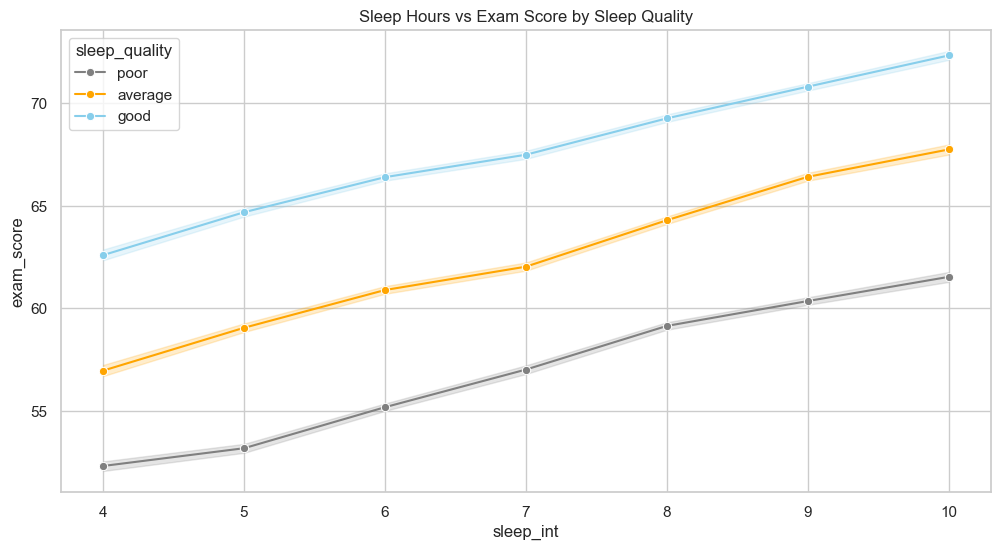

C:\Users\원정현\AppData\Local\Temp\ipykernel_4700\533946333.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\원정현\AppData\Local\Temp\ipykernel_4700\533946333.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


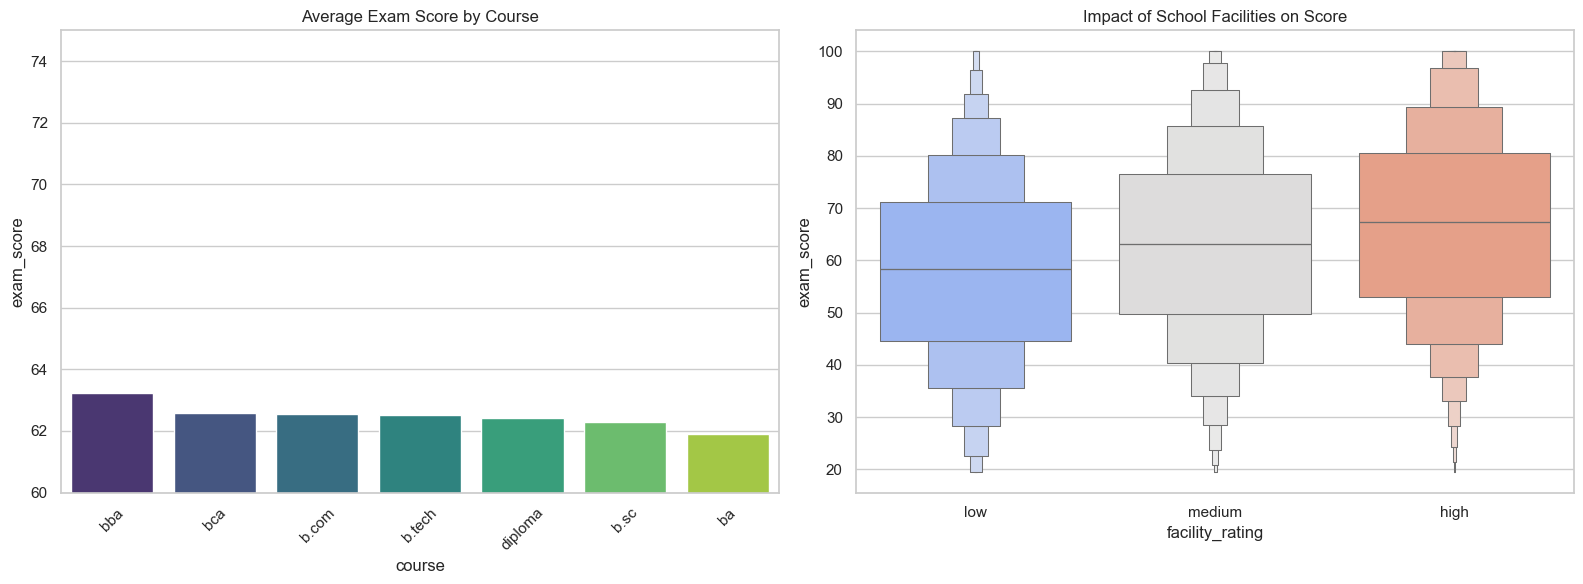

In [ ]:
# 수면과 학업 요소 심층 EDA 설정

# 수면 시간을 정수 단위로 변환
train["sleep_int"] = train["sleep_hours"].round().astype(int)

# 수면 질별 수면 시간과 점수 관계 시각화
plt.figure(figsize=(12, 6))
sleep_quality_order = ["poor", "average", "good"]
sleep_quality_palette = {"poor": "gray", "average": "orange", "good": "skyblue"}

sns.lineplot(
    data=train,
    x="sleep_int",
    y="exam_score",
    hue="sleep_quality",
    hue_order=sleep_quality_order,
    palette=sleep_quality_palette,
    marker="o",
)
plt.title("Sleep Hours vs Exam Score by Sleep Quality")
plt.grid(True)
plt.show()

# 전공별 점수와 시설 영향 시각화 축 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 전공별 평균 점수 정렬 순서 계산
course_order = (
    train.groupby("course")["exam_score"]
    .mean()
    .sort_values(ascending=False)
    .index
)

# 전공별 평균 점수 시각화
sns.barplot(
    data=train,
    x="course",
    y="exam_score",
    order=course_order,
    ax=axes[0],
    palette="viridis",
    errorbar=None,
)
axes[0].set_title("Average Exam Score by Course")
axes[0].tick_params(axis="x", rotation=45)
axes[0].set_ylim(60, 75)

# 시설 등급별 점수 분포 시각화
sns.boxenplot(
    data=train,
    x="facility_rating",
    y="exam_score",
    ax=axes[1],
    palette="coolwarm",
)
axes[1].set_title("Impact of School Facilities on Score")

# 레이아웃 정리
plt.tight_layout()
plt.show()

# 나이별 평균 점수 추이 시각화
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=train,
    x="age",
    y="exam_score",
    marker="o",
    color="purple",
)
plt.title("Average Exam Score by Age")
plt.grid(True)
plt.show()